In [1]:
%matplotlib inline


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from fplanck import fokker_planck

# Parameters
num_cells = 100          # Total number of cells
num_genes = 100          # Number of genes
num_timepoints = 3       # Number of time points
T = 2.0                  # Total time duration
dt = T / (num_timepoints - 1)  # Time step

# SDE parameters for the Fokker-Planck equation
alpha = 1.0  # Drift coefficient (deterministic part)
beta = 0.2   # Diffusion coefficient (stochastic part)

# Create initial conditions (initial gene expression)
initial_gene_expression = np.random.normal(loc=1.0, scale=0.5, size=(num_cells, num_genes))

# Time grid
time_points = np.linspace(0, T, num_timepoints)

# Prepare container for results
gene_expression_over_time = np.zeros((num_cells, num_genes, num_timepoints))

# Fill the initial conditions
gene_expression_over_time[:, :, 0] = initial_gene_expression

# Define the drift and diffusion functions
def drift(x):
    return alpha * (1.0 - x)

def diffusion(x):
    return beta * np.ones_like(x)

# Create a Fokker-Planck solver
fp_solver = fokker_planck(drift=drift, diffusion=diffusion)

# Simulate the dynamics over time
for t in range(1, num_timepoints):
    for cell in range(num_cells):
        for gene in range(num_genes):
            # Solve the Fokker-Planck equation for this time step
            gene_expression = gene_expression_over_time[cell, gene, t-1]
            solution = fp_solver.evolve(gene_expression, dt)
            
            # Store the solution (gene expression at this time step)
            gene_expression_over_time[cell, gene, t] = solution[-1]

# Visualize the simulated gene expression of the first 10 genes for the first cell
for gene in range(10):
    plt.plot(np.arange(num_timepoints), gene_expression_over_time[0, gene, :], label=f'Gene {gene+1}')

plt.xlabel('Time Point')
plt.ylabel('Gene Expression')
plt.title('Gene Expression Dynamics for the First Cell')
plt.legend()
plt.show()

# The gene_expression_over_time array now contains the simulated gene expression data over time


TypeError: fokker_planck.__init__() got an unexpected keyword argument 'drift'

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from fplanck import fokker_planck

# Parameters
num_cells = 100          # Total number of cells
num_genes = 100          # Number of genes
num_timepoints = 3       # Number of time points
T = 2.0                  # Total time duration
dt = T / (num_timepoints - 1)  # Time step

# Fokker-Planck parameters
temperature = 1.0        # Temperature of the surrounding bath
drag = 0.5               # Drag coefficient
extent = 10.0            # Extent of the grid (for spatial domain)
resolution = 0.1         # Spatial resolution of the grid

# Define a potential function (simple quadratic potential)
def potential(*x):
    return 0.5 * np.sum(np.array(x)**2, axis=0)

# Define a force function (gradient of the potential)
def force(x):
    return -x  # Corresponds to the gradient of the quadratic potential

# Boundary condition (reflecting boundary)
boundary = 'reflecting'

# Initialize gene expression matrix for the initial time point
initial_gene_expression = np.random.normal(loc=1.0, scale=0.5, size=(num_cells, num_genes))

# Time grid
time_points = np.linspace(0, T, num_timepoints)

# Prepare container for results
gene_expression_over_time = np.zeros((num_cells, num_genes, num_timepoints))

# Fill the initial conditions
gene_expression_over_time[:, :, 0] = initial_gene_expression

# Create a grid for solving the Fokker-Planck equation
grid_points = np.arange(-extent, extent, resolution)

# Function to find the closest grid point for a given initial expression value
def find_closest_grid_point(value, grid):
    return np.argmin(np.abs(grid - value))

# Simulate the dynamics over time using the Fokker-Planck equation
for t in range(1, num_timepoints):
    for cell in range(num_cells):
        for gene in range(num_genes):
            # Get the initial expression value
            x_prev = gene_expression_over_time[cell, gene, t-1]
            
            # Find the closest grid point
            idx = find_closest_grid_point(x_prev, grid_points)
            
            # Initialize the probability distribution as a delta function centered at x_prev
            p_initial = np.zeros_like(grid`_points)
            p_initial[idx] = 1.0
            
            # Solve the Fokker-Planck equation for this time step
            fp_solver = fokker_planck(
                temperature=temperature,
                drag=drag,
                extent=[-extent, extent],  # Grid extent
                resolution=resolution,     # Resolution of the grid
                potential=potential,
                force=force,
                boundary=boundary
            )
            
            p_values = fp_solver(p_initial, dt)
            
            # Update the gene expression by sampling from the resulting distribution
            gene_expression_over_time[cell, gene, t] = np.random.choice(grid_points, p=p_values / np.sum(p_values))

# Visualize the simulated gene expression of the first 10 genes for the first cell
for gene in range(10):
    plt.plot(np.arange(num_timepoints), gene_expression_over_time[0, gene, :], label=f'Gene {gene+1}')

plt.xlabel('Time Point')
plt.ylabel('Gene Expression')
plt.title('Gene Expression Dynamics for the First Cell')
plt.legend()
plt.show()

# The gene_expression_over_time array now contains the simulated gene expression data over time


ValueError: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.

In [13]:
import numpy as np
import ufl
from dolfinx import mesh, fem, plot
from mpi4py import MPI
from petsc4py import PETSc
from ufl import TrialFunction, TestFunction, dx, grad, div, dot
from dolfinx.io import XDMFFile
import matplotlib.pyplot as plt

In [16]:
L = 10
num_cells = [100,250,150]
T = 3.0
num_steps = 100
dt = T / num_steps
D = 0.1
F_const = 0.1
Growth_factor = 0.5

corner1 = np.array([0.0,0.0,0.0])
corner2 = np.array([100.0,500.0,3.0])
num_cells2 = [100,500,3]
domain = mesh.create_box(MPI.COMM_WORLD,[corner1,corner2],num_cells2)

In [19]:
# Define function space
V = fem.FunctionSpace(domain, ("CG", 1),)


TypeError: FunctionSpace.__init__() missing 1 required positional argument: 'cppV'

In [15]:
??mesh.create_interval

Signature:
mesh.create_interval(
    comm: '_MPI.Comm',
    nx: 'int',
    points: 'npt.ArrayLike',
    dtype: 'npt.DTypeLike' = <class 'numpy.float64'>,
    ghost_mode=dolfinx.cpp.mesh.GhostMode.shared_facet,
    partitioner=None,
) -> 'Mesh'
Source:   
def create_interval(
    comm: _MPI.Comm,
    nx: int,
    points: npt.ArrayLike,
    dtype: npt.DTypeLike = default_real_type,
    ghost_mode=GhostMode.shared_facet,
    partitioner=None,
) -> Mesh:
    """Create an interval mesh.

    Args:
        comm: MPI communicator.
        nx: Number of cells.
        points: Coordinates of the end points.
        dtype: Float type for the mesh geometry(``numpy.float32``
            or ``numpy.float64``).
        ghost_mode: Ghost mode used in the mesh partitioning. Options
            are ``GhostMode.none`` and ``GhostMode.shared_facet``.
        partitioner: Partitioning function to use for determining the
            parallel distribution of cells across MPI ranks.

    Returns:
        An 

In [ ]:
# Create a 1D mesh
domain = mesh.create_interval(MPI.COMM_WORLD, num_cells, [0, L])

# Define function space
V = fem.FunctionSpace(domain, ("CG", 1))

# Define trial and test functions
p = TrialFunction(V)
v = TestFunction(V)

# Initial condition: Gaussian centered at L/2
p_n = fem.Function(V)
p_n.interpolate(lambda x: np.exp(-0.5 * (x[0] - L/2)**2 / 0.5**2))

# Define the drift (force) term F(x)
def F(x):
    return F_const * (x - L/2)  # Simple linear drift towards L/2


a = (p * v + dt * dot(F(ufl.SpatialCoordinate(domain)), grad(p)) * v + dt * D * dot(grad(p), grad(v))) * dx
L = p_n * v * dx

## Simulation from gWOT

In [2]:
import torch
import ot
import sklearn
import numpy as np
import scipy as sp
import math
import autograd
import autograd.numpy as np
from pathos.multiprocessing import ProcessingPool as Pool
import copy
import sklearn
from sklearn import metrics


In [3]:
# Define timeserie class

class TimeSeries():
    """Base class for time-series dataset.
    
    :param x: `np.array` of observed datapoints. 
    :param dt: `np.array` of time increments `t[i+1] - t[i]`.
    :param t_idx: `np.array` of time indices for each datapoint in `x`. 
    :param D: diffusivity 
    """
    def __init__(self, x, dt, t_idx, D = None):
        self.x = x
        self.t_idx = t_idx
        self.T = len(np.unique(t_idx))
        self.N = np.unique(t_idx, return_counts = True)[1]
        self.D = D
        self.dt = dt

In [4]:
# Util functions

def dW(dt, sz):
    """ Wiener process increments of size `sz`
    """
    return np.sqrt(dt)*np.random.standard_normal(sz)

def sde_integrate(dV, nu, x0, t, steps, birth_death = False, b = None, d = None, g_max = 250, snaps = None):
    """Integrate SDE using Euler-Maruyama method (with birth-death)
    
    :param dV: function `dV(x, t)` specifying the drift field
    :param nu: diffusivity
    :param x0: initial particle positions at time `t = 0`
    :param steps: time steps to use in Euler-Maruyama method
    :param birth_death: `True` if simulation needs birth-death
    :param b: if `birth_death == True`, birth rate `b(x, t)`
    :param d: if `birth_death == True`, death rate `d(x, t)`
    :param g_max: if `birth_death == True`, we store `g_max*x0.shape[0]` particles 
                and error if exceeded.
    :param snaps: `np.array` of step indices at which to record particle snapshot. 
    """
    if birth_death:
        # store g_max*x0.size[0] particles. Output error if we try and exceed this, though.
        # g = g(x, t) = b(x, t) - d(x, t)
        x = np.zeros((g_max*x0.shape[0], x0.shape[1]))
        x[0:x0.shape[0], :] = x0
    else:
        x = np.array(x0, copy = True)
    
    x_mask = np.zeros(x.shape[0], dtype = bool)
    x_mask[0:x0.shape[0]] = True

    dt = t/steps if steps > 0 else None
    t_current = 0
    snap = np.zeros((len(snaps), ) + x.shape)
    snap_mask = np.zeros((len(snaps), ) + (x.shape[0], ), dtype = bool)
    dV_vec = np.zeros(x.shape)
    
    if steps == 0:
        if snaps is not None and 0 == snaps:
            snap[0] = x
            snap_mask[0] = x_mask

    for i in range(0, steps):
        dV_vec[x_mask, :] = dV(x[x_mask, :], t_current)
        x[x_mask, :] = x[x_mask, :] - dV_vec[x_mask, :]*dt + np.sqrt(nu)*dW(dt, x[x_mask, :].shape)

        # birth/death step
        if birth_death and b is not None and d is not None:
            x_mask_new = x_mask.copy()
            for j in range(0, x.shape[0]):
                if x_mask[j]:
                    u = np.random.uniform()
                    if u < dt*b(x[j, :], t_current):
                        # birth event
                        k = np.where(x_mask_new == False)[0][0]
                        x[k, :] = x[j, :]
                        x_mask_new[k] = True
                    elif u < dt*b(x[j, :], t_current) + dt*d(x[j, :], t_current):
                        # death event
                        x_mask_new[j] = False
                    else:
                        pass
            x_mask = x_mask_new 
        t_current += dt
            
        if snaps is not None and np.sum(i == snaps):
            snap[np.where(i == snaps)[0]] = x
            snap_mask[np.where(i == snaps)[0]] = x_mask
    return snap, snap_mask


In [5]:
class Simulation(TimeSeries):
    """Diffusion-drift SDE simulations using the Euler-Maruyama method. 
    
    :param V: potential function :math:`(x, t) \\mapsto V(x, t)` 
    :param dV: potential gradient :math:`(x, t) \\mapsto \\nabla V(x, t)`
    :param N: number of initial particles to use, :math:`N_i` corresponds to time point :math:`t_i`
    :param T: number of timepoints at which to capture snapshots
    :param d: dimension :math:`d` of simulation
    :param D: diffusivity :math:`D`
    :param t_final: final time :math:`t_\\mathrm{final}` (initial time is always 0)
    :param ic_func: function accepting arguments `(N, d)` and returning an array `X` of dimensions `(N, d)`
                    where `X[i, :]` corresponds to the `i`th initial particle position
    :param pool: ProcessingPool to use for parallel computation (or `None`)
    :param birth_death: whether to incorporate birth-death process
    :param birth: if `birth_death == True`, a function accepting arguments `(X, t)` returning 
                    a vector of birth rates :math:`\\beta` for each row in `X`
    :param death: if `birth_death == True`, a function accepting arguments `(X, t)` returning 
                    a vector of death rates :math:`\\delta` for each row in `X`
    """
    def __init__(self, V, dV, N, T, d, D, t_final, ic_func, pool, birth_death = False, birth = None, death = None):
        self.V = V
        self.dV = dV
        self.birth_death = birth_death
        self.birth = birth
        self.death = death
        self.N = N
        self.d = d
        self.T = T
        self.D = D
        self.t_final = t_final
        self.ic_func = ic_func
        self.dt = (t_final/(T-1))*np.ones(T-1)
        self.pool = pool

    def sample(self, steps_scale = 1, trunc = None):
        """Sample time-series from Simulation. Simulates independent evolving particles using 
            Euler-Maruyama method.

        :param steps_scale: number of Euler-Maruyama steps to take between timepoints. 
        :param trunc: if provided, subsample all snapshots to have `trunc` particles. 
        """
        ic_all = [self.ic_func(self.N[i], self.d) for i in np.arange(0, self.T, 1)]
        def F(i):
            snap, snap_mask = sde_integrate(self.dV, nu = self.D, x0 = ic_all[i],
                                        birth_death = self.birth_death,
                                        b = self.birth, d = self.death, 
                                        t = (self.t_final)*(i/self.T), 
                                        steps = steps_scale*i, 
                                        snaps = np.array([max(steps_scale*i-1, 0), ])) 
            return snap[snap_mask, :]
        if self.pool:
            self.snaps = self.pool.map(F, np.arange(0, self.T, 1))
        else:
            self.snaps = [F(i) for i in np.arange(0, self.T, 1)]

        if trunc is not None:
            samp_sizes = np.array([s.shape[0] for s in self.snaps])
            for i in range(0, len(self.snaps)):
                self.snaps[i] = self.snaps[i][np.random.choice(samp_sizes[i], size = min(samp_sizes[i], trunc)), :]
        self.x = np.vstack(self.snaps) 
        self.t_idx = np.concatenate([np.array([i]).repeat(self.snaps[i].shape[0]) for i in range(0, len(self.snaps))])
        return self.snaps

    def sample_trajectory(self, steps_scale = 1, N = 1):
        """Sample trajectory from simulation

        :param steps_scale: number of Euler-Maruyama steps to take between timepoints. 
        :param N: number of trajectories to sample 
        :return: `np.array` of dimensions 
        """
        ic = self.ic_func(N, self.d)
        snap, snap_mask = sde_integrate(self.dV, nu = self.D, x0 = ic,
            b = self.birth, d = self.death, 
            t = self.t_final, 
            steps = self.T*steps_scale, 
            snaps = np.arange(self.T)*steps_scale) 
        return np.moveaxis(snap, 0, 1)

    def __copy__(self):
        return Simulation(V = self.V, dV = self.dV, N = self.N, T = self.T, d = self.d, D = self.D, t_final = self.t_final,
                         ic_func = self.ic_func, pool = self.pool,
                         birth_death = self.birth_death, birth = self.birth, death = self.death)

    def __deepcopy__(self, memo):
        return Simulation(V = copy.deepcopy(self.V, memo), dV = copy.deepcopy(self.dV, memo), 
                             N = self.N, T = self.T, d = self.d, D = self.D, t_final = self.t_final,
                             ic_func = copy.deepcopy(self.ic_func, memo), pool = self.pool,
                             birth_death = self.birth_death, 
                             birth = copy.deepcopy(self.birth, memo), death = copy.deepcopy(self.death, memo))

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.set_default_dtype(torch.float64)

In [7]:
# setup simulation parameters
dim = 4 # dimension of simulation
sim_steps = 1000 # number of steps to use for Euler-Maruyama method
T = 50 # number of timepoints
N = 20 # number of particles per timepoint
D = 0.25 # diffusivity
t_final = 0.75 # simulation run on [0, t_final]

In [ ]:
4

In [8]:
# setup potential function
def Psi(x, t, dim = dim):
    x0 = 1.15*np.array([1, 1] + [0, ]*(dim - 2))
    x1 = -np.array([1, 1] + [0, ]*(dim - 2))
    return np.sum((x - x0)*(x - x0), axis = -1) * np.sum((x - x1)*(x - x1), axis = -1)
# get gradient 
dPsi = autograd.elementwise_grad(Psi)


In [9]:
# branching rates
beta = lambda x, t: 5*((np.tanh(2*x[0]) + 1)/2)
delta = lambda x, t: 0

# function for particle initialisation
ic_func = lambda N, d: np.random.randn(N, d)*0.1

# setup simulation object
sim = Simulation(V = Psi, dV = dPsi, birth_death = True, 
                  birth = beta, 
                  death = delta,
                  N = np.repeat(N, T), 
                  T = T, 
                  d = dim, 
                  D = D, 
                  t_final = t_final, 
                  ic_func = ic_func, 
                  pool = None)

In [10]:
ic_all = [ic_func(N[i],d) for i in np.arange(0,T, 1)]


TypeError: 'int' object is not subscriptable

In [11]:
# sample from simulation
sim.sample(steps_scale = int(sim_steps/sim.T), trunc = N);

In [12]:
# plot samples
plt.scatter(np.kron(np.linspace(0, t_final, T), np.ones(N)), sim.x[:, 0], alpha = 0.1, color = "red")
plt.xlabel("t"); plt.ylabel("dim 1")

NameError: name 'plt' is not defined

In [ ]:
# sample ground truth paths
# sampling trajectories from Simulation object ignores the branching
N_paths = 250
paths_gt = sim.sample_trajectory(steps_scale = int(sim_steps/sim.T), N = N_paths)


In [ ]:
# plot sample paths
plt.figure(figsize = (10, 3))
plt.subplot(1, 3, 1)
plt.plot(np.linspace(0, 1, paths_gt.shape[1]), paths_gt[:, :, 0].T, color = 'green', alpha = 0.1);
plt.xlabel("t"); plt.ylabel("x")
plt.title("Ground truth")

## Create a log normal distribution

In [12]:
import scipy.stats

In [14]:
#dist = scipy.stats.lognorm.rvs(-2.7,0.8,15000)
dist = scipy.stats.lognorm.rvs(0.8, 0, -2.7, size=100000)

plt.hist(dist, bins=100)
print(np.mean(dist))
print(np.std(dist))

ValueError: Domain error in arguments. The `scale` parameter must be positive for all distributions, and many distributions have restrictions on shape parameters. Please see the `scipy.stats.lognorm` documentation for details.

In [15]:
# Parameters for the log-normal distribution
mean = -2.7
std_dev = 0.8
size = int(1.5 * 10**4)  # Size of the distribution

# Generate the log-normal distribution
log_normal_data = np.random.lognormal(mean, std_dev, size)

In [27]:
time_points = [1,2,3,4,5]

In [17]:
import sympy as sp
import numpy as np

In [25]:
def pd_fv_syms():
    # Model configuration
    model = {
        'param': 'log',
        'forward': True,
        'adjoint': False
    }

    # PDE discretization
    n_grid = 300
    grid = np.linspace(0, 1, n_grid)

    h2inv = (1 / (grid[1] - grid[0])) ** 2

    grid_x = np.linspace(grid[0] + (grid[1] - grid[0]) / 2, grid[-2] + (grid[-1] - grid[-2]) / 2, n_grid - 1)

    # STATES
    # Create state syms: vector for x at each grid point
    x = sp.symbols(f'x0:{n_grid-1}')
    x = sp.Matrix(x)

    # PARAMETERS (for these sensitivities will be computed)
    D = sp.symbols('D1:D10')
    v = sp.symbols('v1:v10')
    a = sp.symbols('a1:a10')

    p = sp.Matrix([*D, *v, *a])

    # Spline interpolation for D, v, a
    Db1 = simple_spline_sym(np.arange(0, 1.125, 0.125), sp.log(sp.Matrix(D)), grid[1:-1])
    Db1 = sp.exp(Db1)

    vb1, dvb1dgrid = simple_spline_sym(np.arange(0, 1.125, 0.125), sp.log(sp.Matrix(v)), grid[1:-1])
    vb1 = sp.exp(vb1)
    dvb1dgrid = vb1 * dvb1dgrid

    grid0 = 29
    v_end_b1, _ = cspline_00(vb1[-grid0], dvb1dgrid[-grid0], grid[-grid0], grid[-2], grid[-grid0:-1])
    vb1 = sp.Matrix(list(vb1[:len(vb1) - grid0]) + [v_end_b1] + [0])

    ab1 = simple_spline_sym(np.arange(0, 1.125, 0.125), sp.log(sp.Matrix(a)), grid_x)

    # CONSTANTS (for these no sensitivities will be computed)
    k = sp.symbols(f'k0:{n_grid-1}')
    k = sp.Matrix(k)

    # SYSTEM EQUATIONS
    t = sp.symbols('t')
    xdot = sp.Matrix.zeros(len(x), 1)

    # Finite volume approximation to PDE on grid
    # Robin boundary on the left hand side and Dirichlet on the right hand side

    xdot[0] = h2inv * (-Db1[0] * (x[0] - x[1])) - vb1[0] * 0.5 * (x[0] + x[1]) * sp.sqrt(h2inv) + ab1[0] * x[0]

    xdot[-1] = h2inv * (Db1[-1] * (x[-2] - x[-1])) + vb1[-1] * 0.5 * (x[-2] + x[-1]) * sp.sqrt(h2inv) + ab1[-1] * x[-1]

    for i in range(1, n_grid - 2):
        xdot[i] = (h2inv * (Db1[i - 1] * (x[i - 1] - x[i]) - Db1[i] * (x[i] - x[i + 1])) +
                   sp.sqrt(h2inv) * 0.5 * (vb1[i - 1] * (x[i - 1] + x[i]) - vb1[i] * (x[i] + x[i + 1])) +
                   ab1[i] * x[i])

    # INITIAL CONDITIONS
    x0 = k.copy()

    # OBSERVABLES
    N = sp.sum(x) / sp.sqrt(h2inv)
    y = x.row_join(sp.Matrix([N]))

    # SYSTEM STRUCTURE
    model['sym'] = {
        'x': x,
        'k': k,
        'xdot': xdot,
        'p': p,
        'x0': x0,
        'y': y
    }

    return model

In [22]:
import sympy as sp
import numpy as np
from scipy.interpolate import CubicSpline

def simple_spline_sym(x_points, y_points, grid):
    # Convert y_points to symbolic if not already
    y_points_sym = sp.Matrix(y_points)

    # Perform the cubic spline interpolation using SciPy (for numeric grid)
    if isinstance(grid, (list, np.ndarray)):
        spline = CubicSpline(x_points, y_points_sym)
        grid_np = np.array(grid)
        spline_vals = spline(grid_np)
        spline_derivatives = spline(grid_np, 1)  # First derivative
    else:
        # For symbolic grid, we define the spline using SymPy
        spline_vals = sp.Matrix([sp.interpolating_spline(3, sp.Matrix(x_points), y_points_sym, xi) for xi in grid])
        spline_derivatives = sp.Matrix([spline_vals[i].diff(grid[i]) for i in range(len(grid))])
    
    return spline_vals, spline_derivatives



In [23]:
from scipy.interpolate import CubicHermiteSpline

def cspline_00(y_end, dydx_end, x_start, x_end, grid_segment):
    # Create the cubic Hermite spline with boundary conditions
    x_points = np.array([x_start, x_end])
    y_points = np.array([y_end, 0])  # Assume the function goes to 0 at x_end
    dydx_points = np.array([dydx_end, 0])  # Derivative boundary conditions
    
    # Construct the cubic Hermite spline
    spline = CubicHermiteSpline(x_points, y_points, dydx_points)
    
    # Evaluate the spline at the grid_segment points
    spline_result = spline(grid_segment)
    
    return spline_result, spline.derivative()(grid_segment)


In [26]:



if __name__ == "__main__":
    model = pd_fv_syms()
    print(model)

TypeError: 
Data type not understood; expecting list of lists or lists of values.

In [28]:
import numpy as np

# Parameters for the log-normal distribution
mu = -2.7
sigma = 0.8
N0 = 1.5 * 10**4

# Generate the initial distribution
initial_distribution = N0 * np.random.lognormal(mean=mu, sigma=sigma, size=int(N0))


In [29]:
from scipy.interpolate import CubicSpline

# Example grid points and parameter values (these would be derived from your specific problem)
s_points = np.linspace(0, 1, 9)  # 9 equally spaced points in log space for D(s) and v(s)
D_values = np.log([D1, D2, D3, D4, D5, D6, D7, D8, D9])
v_values = np.log([v1, v2, v3, v4, v5, v6, v7, v8, v9])
g_values = [g1, g2, g3, g4, g5, g6, g7, g8, g9]  # Linear space for g(s)

# Create cubic splines
D_spline = CubicSpline(s_points, np.exp(D_values))
v_spline = CubicSpline(s_points, np.exp(v_values))
g_spline = CubicSpline(s_points, g_values)


NameError: name 'D1' is not defined

In [30]:
# Define the time points and other parameters for the simulation
time_points = np.array([1, 2, 3, 4, 5])
n_samples = 10000

# Generate samples for each time point
for t in time_points:
    # Evaluate splines at specific points (depends on the model details)
    # For example, at the midpoints of the grid:
    grid = np.linspace(0, 1, 300)
    
    # Evaluate splines
    D_eval = D_spline(grid)
    v_eval = v_spline(grid)
    g_eval = g_spline(grid)
    
    # Use these evaluations in your model to simulate cell densities
    # (This step depends on your model's equations, which aren't fully specified)
    # For now, let's assume we have a density function p(s, t)
    
    # Draw samples based on the simulated probability distribution
    simulated_pdf = ...  # The output of your simulation model
    cell_state_samples = np.random.choice(grid, size=n_samples, p=simulated_pdf)
    
    # Generate population size samples for each time point
    # Assuming the mean and variance are known for each time point
    mean_population = np.sum(simulated_pdf)  # This is just a placeholder
    variance_population = [1e6, 2e6, 3e6, 4e6, 5e6, 6e6]  # Example variance
    population_size_samples = np.random.normal(loc=mean_population, scale=np.sqrt(variance_population[t-1]), size=20)

    # Store or analyze these samples as needed


NameError: name 'D_spline' is not defined

In [13]:
from scipy.stats import lognorm

In [14]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Define the spatial and time grid
n_grid = 300
grid = np.linspace(0, 1, n_grid)
dt = 0.01  # time step
T = 5      # total time

n_time = int(T / dt)
# Parameters for the log-normal distribution
mu = -2.7
sigma = 0.8
N0 = 1.5 * 10**4

# Generate the initial distribution
#u0 = N0 * np.random.lognormal(mean=mu, sigma=sigma, size=int(N0))

u0 = N0 * lognorm.pdf(grid,s=sigma,scale=np.exp(mu))
options_u0 = 0.5 * (u0[:n_grid-1] + u0[1:n_grid])


In [15]:
# Define the parameters
parameters = {}

# 'min' parameter list
parameters['min'] = np.concatenate([
    -10.3616 * np.ones(9), 
    -11.5129 * np.ones(9), 
    -6 * np.ones(9)
])

# 'max' parameter list
parameters['max'] = np.concatenate([
    np.zeros(9), 
    np.zeros(9), 
    5 * np.ones(9)
])

# 'name' parameter list
parameters['name'] = [
    'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
    'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9',
    'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9'
]

# 'number' is the length of the 'name' parameter list
parameters['number'] = len(parameters['name'])

In [16]:

# number of simulated single cells
options = {}
options['nSample'] = 10000
# number of replicates for single cells
options['nReplicate'] = 3
# number of population size measurement replicates
options['pSample'] = 20

# time points of population size measurements
D = {}
D['pop'] = {}
D['pop']['t'] = np.arange(6)

# time points of single cell measurement replicates
D['ind'] = {}
D['ind']['tp'] = np.concatenate([np.zeros(options['nReplicate']),
                                 np.ones(options['nReplicate']),
                                 2 * np.ones(options['nReplicate']),
                                 3 * np.ones(options['nReplicate']),
                                 4 * np.ones(options['nReplicate']),
                                 5 * np.ones(options['nReplicate'])])

# forward simulation B
np.random.seed(2006)

# variance for data
options['varPop'] = [1e7, 5e7, 2e8, 2e9, 2e10, 2e11]

# true parameters
parameters['true'] = np.array([-7, -7, -7, -7, -7, -7, -7, -7, -8,   # D
                               -4, -2, -2, -2, -3, -4, -4, -6, -7,   # v
                               2.5, 0.5, 0.5, 0.5, 1.5, 1, 2, 0, 0]) # a


In [19]:
def simple_spline_sym(x, y, xx):
    """
    Computes the symbolic expression of a natural cubic spline.
    :param x: array of grid positions (assumed equidistant)
    :param y: array of symbolic variables at positions x
    :param xx: interpolation points where we want to evaluate the spline
    :return: yy symbolic spline interpolation at xx, dyydx (optional) derivative of spline at xx
    """
    # Ensure sympy symbolic arrays for y and xx
    yy = sp.zeros(len(xx), 1)
    dyydx = sp.zeros(len(xx), 1)

    # Equidistant step size h
    h = x[1] - x[0]
    
    # First derivatives (differences between consecutive y's)
    b = (y[1:] - y[:-1]) / h
    
    # Matrix system for solving second derivatives (z)
    v = 4 * h
    u = 6 * (b[1:] - b[:-1])
    
    # Solving for z (second derivatives)
    A = np.diag([v] * (len(x) - 2)) + np.diag([h] * (len(x) - 3), k=-1) + np.diag([h] * (len(x) - 3), k=1)
    z_interior = np.linalg.solve(A, u)
    
    # Add boundary conditions (natural spline z=0 at boundaries)
    z = np.concatenate([[0], z_interior, [0]])

    # Evaluate spline and optionally its derivative at each interpolation point
    for i in range(len(xx)):
        # Find the interval where xx[i] lies (between x[k] and x[k+1])
        ind = min(np.searchsorted(x, xx[i], side='right') - 1, len(x) - 2)

        # Cubic spline interpolation formula
        yy[i] = (
            (z[ind+1] / (6 * h)) * (xx[i] - x[ind])**3 +
            (z[ind] / (6 * h)) * (x[ind+1] - xx[i])**3 +
            (y[ind+1] / h - (z[ind+1] * h) / 6) * (xx[i] - x[ind]) +
            (y[ind] / h - (z[ind] * h) / 6) * (x[ind+1] - xx[i])
        )
        
        # If second output is requested, compute the derivative
        dyydx[i] = (
            (z[ind+1] / (2 * h)) * (xx[i] - x[ind])**2 -
            (z[ind] / (2 * h)) * (x[ind+1] - xx[i])**2 +
            b[ind] - (h / 6) * (z[ind+1] - z[ind])
        )

    return yy, dyydx

def cspline_00(v, vp, x_k, x_kp1, xp):
    """
    Calculate Hermite cubic spline with end slope 0.
    
    Parameters:
    v     : value at x_k
    vp    : slope (derivative) at x_k
    x_k   : start point of interval
    x_kp1 : end point of interval
    xp    : point at which to evaluate the spline
    
    Returns:
    cp    : spline value at xp
    dcpdx : derivative of the spline at xp
    """
    
    # Hermite cubic spline
    tp = (xp - x_k) / (x_kp1 - x_k)
    
    # Spline value at xp
    cp = (2 * tp**3 - 3 * tp**2 + 1) * v + (tp**3 - 2 * tp**2 + tp) * vp * (x_kp1 - x_k)
    
    # Derivative of tp with respect to x
    dtdx = 1 / (x_kp1 - x_k)
    
    # Spline derivative at xp
    dcpdx = (6 * tp**2 * dtdx - 6 * tp * dtdx) * v + (3 * tp**2 * dtdx - 4 * tp * dtdx + dtdx) * vp * (x_kp1 - x_k)
    
    return cp, dcpdx

In [121]:
D = sp.symbols(f'D1:10')
D = sp.Matrix(D)


In [24]:
parameters['true']

array([-7. , -7. , -7. , -7. , -7. , -7. , -7. , -7. , -8. , -4. , -2. ,
       -2. , -2. , -3. , -4. , -4. , -6. , -7. ,  2.5,  0.5,  0.5,  0.5,
        1.5,  1. ,  2. ,  0. ,  0. ])

In [103]:

def pd_fv_syms(time_array,parameters,initial):
    # Initialize model
    model = {}
    model['param'] = 'log'
    model['forward'] = True
    model['adjoint'] = False

    # PDE discretization
    n_grid = 300
    grid = np.linspace(0, 1, n_grid)
    h2inv = (1 / (grid[1] - grid[0])) ** 2
    grid_x = np.linspace(grid[0] + (grid[1] - grid[0]) / 2, grid[-2] + (grid[-1] - grid[-2]) / 2, n_grid - 1)

    # States
    x = sp.symbols(f'x0:{n_grid-1}')
    x = sp.Matrix(x)

    # Parameters
    D = sp.symbols(f'D1:10')
    v = sp.symbols(f'v1:10')
    a = sp.symbols(f'a1:10')

    p = D + v + a
    D = sp.Matrix(D)
    v = sp.Matrix(v)
    a = sp.Matrix(a)

    # Apply spline interpolation (log space)
    D_grid, _ = simple_spline_sym(np.arange(0, 1.125, 0.125), np.log(D), grid[1:-1])
    D_grid = np.exp(D_grid)

    v_grid, dvb1dgrid = simple_spline_sym(np.arange(0, 1.125, 0.125), np.log(v), grid[1:-1])
    v_grid = np.exp(v_grid)
    dvb1dgrid = v_grid * dvb1dgrid

    # Boundary handling
    grid0 = 29
    v_end_b1, _ = cspline_00(v_grid[-grid0], dvb1dgrid[-grid0], grid[-grid0], grid[-1], grid[-grid0:])
    v_grid[-grid0:] = np.concatenate([v_end_b1, np.zeros(1)])

    a_grid = simple_spline_sym(np.arange(0, 1.125, 0.125), np.log(a), grid_x)[0]

    # Constants
    k = sp.symbols(f'k0:{n_grid-1}')
    k = sp.Matrix(k)

    # System Equations
    t = sp.symbols('t')
    xdot = sp.zeros(n_grid-1, 1)

    # Robin boundary on left, Dirichlet on right
    xdot[0] = h2inv * (-D_grid[0] * (x[0] - x[1])) - v_grid[0] * 0.5 * (x[0] + x[1]) * sp.sqrt(h2inv) + a_grid[0] * x[0]
    xdot[n_grid-2] = h2inv * (D_grid[-1] * (x[n_grid-2] - x[n_grid-3])) + v_grid[-1] * 0.5 * (x[n_grid-3] + x[n_grid-2]) * sp.sqrt(h2inv) + a_grid[-1] * x[n_grid-2]

    for i in range(1, n_grid-2):
        xdot[i] = (h2inv * (D_grid[i-1] * (x[i-1] - x[i]) - D_grid[i] * (x[i] - x[i+1]))
                   + sp.sqrt(h2inv) * 0.5 * (v_grid[i-1] * (x[i-1] + x[i]) - v_grid[i] * (x[i] + x[i+1]))
                   + a_grid[i] * x[i])

    # Initial Conditions
    x0 = k

    # Observables
    N = sp.Sum(x[i] / sp.sqrt(h2inv) for i in range(n_grid-1))
    y = sp.Matrix([x, N])

    # System structure
    model['sym'] = {'x': x, 'k': k, 'xdot': xdot, 'p': p, 'x0': x0, 'y': y}

    return model


In [32]:
# Define diffusion (D), drift (v), and growth (g) as splines
# For simplicity, we will define some example splines for D, v, and g
D_values = np.exp(np.log([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
v_values = np.exp(np.log([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
g_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

D_spline = CubicSpline(grid, D_values)
v_spline = CubicSpline(grid, v_values)
g_spline = CubicSpline(grid, g_values)

# Initialize u(s, t=0)
u = np.zeros(n_grid)
u[int(n_grid / 2)] = 1  # Initial condition: localized peak in the middle

# Prepare to store the results
results = []

# Time-stepping loop
for t in range(n_time):
    u_new = np.zeros_like(u)
    
    for i in range(1, n_grid - 1):
        D = D_spline(grid[i])
        v = v_spline(grid[i])
        g = g_spline(grid[i])
        
        # Finite difference approximation
        u_x = (u[i+1] - u[i-1]) / (2 * (grid[1] - grid[0]))
        u_xx = (u[i+1] - 2 * u[i] + u[i-1]) / (grid[1] - grid[0])**2
        
        # Update u at the next time step
        u_new[i] = u[i] + dt * (D * u_xx - v * u_x + g * u[i])
    
    # Apply boundary conditions (Dirichlet here as an example)
    u_new[0] = u_new[-1] = 0
    
    # Update u and store the result
    u = u_new.copy()
    results.append(u)

# Visualization of results
plt.imshow(results, aspect='auto', extent=[0, 1, T, 0])
plt.xlabel('Space (s)')
plt.ylabel('Time (t)')
plt.colorbar(label='u(s, t)')
plt.show()

In [26]:
n_grid = 300


## Use DOLFINx to simulate 

In [21]:
import numpy as np

from mpi4py import MPI
from petsc4py import PETSc

from dolfinx import fem, mesh, io, plot
import dolfinx.fem.petsc 

In [41]:
# Define temporal parameters
t = 0 # Start time
T = 1.0 # Final time
num_steps = 50
dt = T / num_steps # time step size

# Define mesh
nx, ny = 50, 50
domain = mesh.create_rectangle(MPI.COMM_WORLD, [np.array([-2, -2]), np.array([2, 2])],
                               [nx, ny], mesh.CellType.triangle)
V = fem.functionspace(domain, ("CG", 1))
                      
# Create initial condition
def initial_condition(x, a=5):
    return np.exp(-a*(x[0]**2+x[1]**2))
u_n = fem.Function(V)
u_n.name = "u_n"
u_n.interpolate(initial_condition)

# Create boundary condition
fdim = domain.topology.dim - 1
boundary_facets = mesh.locate_entities_boundary(
    domain, fdim, lambda x: np.full(x.shape[1], True, dtype=bool))
bc = fem.dirichletbc(PETSc.ScalarType(0), fem.locate_dofs_topological(V, fdim, boundary_facets), V)



uh = fem.Function(V)
uh.name = "uh"
uh.interpolate(initial_condition)

import ufl
u, v = ufl.TrialFunction(V), ufl.TestFunction(V)
f = fem.Constant(domain, PETSc.ScalarType(0))

D = ufl.as_tensor(((1, 0), (0, 2)))
a = u * v * ufl.dx + dt*ufl.inner(D * ufl.grad(u), ufl.grad(v)) * ufl.dx
L = (u_n + dt * f) * v * ufl.dx

bilinear_form = fem.form(a)
linear_form = fem.form(L)

A = fem.petsc.assemble_matrix(bilinear_form, bcs=[bc])
A.assemble()
b = fem.petsc.create_vector(linear_form)

solver = PETSc.KSP().create(domain.comm)
solver.setOperators(A)
solver.setType(PETSc.KSP.Type.PREONLY)
solver.getPC().setType(PETSc.PC.Type.LU)

for i in range(num_steps):
    t += dt

    print(t)
    D = ufl.as_tensor(((1 - t, 0), (0, 2 - t)))
    a = u * v * ufl.dx + dt*ufl.inner(D * ufl.grad(u), ufl.grad(v)) * ufl.dx
    print('----> Assembling')
    A = fem.petsc.assemble_matrix(fem.form(a), bcs=[bc])
    A.assemble()
    solver.setOperators(A)

    # Update the right hand side reusing the initial vector
    with b.localForm() as loc_b:
        loc_b.set(0)
    fem.petsc.assemble_vector(b, linear_form)

    # Apply Dirichlet boundary condition to the vector
    fem.petsc.apply_lifting(b, [bilinear_form], [[bc]])
    b.ghostUpdate(addv=PETSc.InsertMode.ADD_VALUES, mode=PETSc.ScatterMode.REVERSE)
    fem.petsc.set_bc(b, [bc])

    # Solve linear problem
    solver.solve(b, uh.vector)
    uh.x.scatter_forward()

    # Update solution at previous time step (u_n)
    u_n.x.array[:] = uh.x.array

0.02
----> Assembling
0.04
----> Assembling
0.06
----> Assembling
0.08
----> Assembling
0.1
----> Assembling
0.12000000000000001
----> Assembling
0.14
----> Assembling
0.16
----> Assembling
0.18
----> Assembling
0.19999999999999998
----> Assembling
0.21999999999999997
----> Assembling
0.23999999999999996
----> Assembling
0.25999999999999995
----> Assembling
0.27999999999999997
----> Assembling
0.3
----> Assembling
0.32
----> Assembling
0.34
----> Assembling
0.36000000000000004
----> Assembling
0.38000000000000006
----> Assembling
0.4000000000000001
----> Assembling
0.4200000000000001
----> Assembling
0.4400000000000001
----> Assembling
0.46000000000000013
----> Assembling
0.48000000000000015
----> Assembling
0.5000000000000001
----> Assembling
0.5200000000000001
----> Assembling
0.5400000000000001
----> Assembling
0.5600000000000002
----> Assembling
0.5800000000000002
----> Assembling
0.6000000000000002
----> Assembling
0.6200000000000002
----> Assembling
0.6400000000000002
----> Assem

In [16]:
import dolfinx
import ufl
import numpy as np
from mpi4py import MPI
from petsc4py import PETSc
from dolfinx import fem, mesh, io, plot
from dolfinx.fem.petsc import LinearProblem


In [17]:
# Define mesh (e.g., unit square)
nx, ny = 50, 50
domain = mesh.create_rectangle(MPI.COMM_WORLD, 
                               points=((0.0, 0.0), (1.0, 1.0)), 
                               n=(nx, ny), 
                               cell_type=mesh.CellType.triangle)

# Define function space
V = fem.functionspace(domain, ("CG", 1))


In [20]:
V

FunctionSpace(Mesh(blocked element (Basix element (P, triangle, 1, gll_warped, unset, False, float64, []), (2,)), 0), Basix element (P, triangle, 1, gll_warped, unset, False, float64, []))

In [18]:
u_0 = fem.Function(V)
with u_0.vector.localForm() as loc:
    loc.set(0)


In [46]:
# Define trial and test functions
u = ufl.TrialFunction(V)
v = ufl.TestFunction(V)

# Time-stepping parameters
dt = 0.01  # time step size
T = 1.0    # final time
t = 0.0    # initial time

# Physical parameters
D = 1.0  # diffusion coefficient
alpha = 0.1  # growth rate
velocity = fem.Constant(domain, PETSc.ScalarType((1.0, 0.0)))  # drift velocity vector

# Define the variational form
a = u * v * ufl.dx + dt * D * ufl.dot(ufl.grad(u), ufl.grad(v)) * ufl.dx \
    + dt * ufl.dot(velocity, ufl.grad(u)) * v * ufl.dx

L = (u_0 + dt * alpha * u_0) * v * ufl.dx


In [47]:
u_bc = fem.Function(V)
with u_bc.vector.localForm() as loc:
    loc.set(1.0)  # example boundary value

bc = fem.dirichletbc(u_bc, fem.locate_dofs_geometrical(V, lambda x: np.isclose(x[0], 0.0)))


In [48]:
# Define solution function
u_sol = fem.Function(V)

# Create the problem
problem = LinearProblem(a, L, bcs=[bc])

while t < T:
    t += dt
    u_sol.x.array[:] = u_0.x.array  # Set initial condition
    problem.solve(u_sol)  # Solve the linear problem

    u_0.x.array[:] = u_sol.x.array  # Update u_0 for the next time step

    # Optionally save or plot the solution
    # ... (e.g., using io.XDMFFile, or matplotlib)


TypeError: LinearProblem.solve() takes 1 positional argument but 2 were given

In [50]:
problem = LinearProblem(a, L, bcs=[bc])

while t < T:
    t += dt
    u_sol = problem.solve()  # Get the solution directly from solve()
    u_0.x.array[:] = u_sol.x.array  # Update u_0 for the next time step

## Using fplanck library

In [11]:
?stoked.drag_sphere

Init signature: stoked.drag_sphere(radius, viscosity)
Docstring:      Drag coeffecients for a sphere
Init docstring:
Arguments:
    radius[N]      sphere radii
    viscosity      dynamic viscosity µ of surrounding fluid
File:           ~/micromamba/envs/sc_rna/lib/python3.11/site-packages/stoked/drag.py
Type:           type
Subclasses:     

Running dynamics: 100%|█████████████████████████████████| 4000/4000 [00:00<00:00, 4889.19it/s]


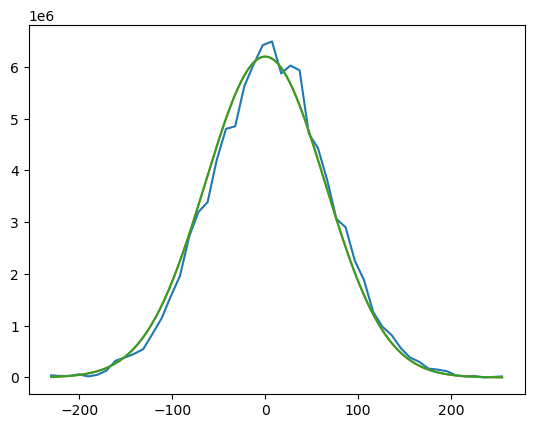

In [1]:
import numpy as np
import stoked
import matplotlib.pyplot as plt
from functools import partial
from scipy import constants

nm = 1e-9
temperature = 300
dt = 1e-6
Nparticles = 10000
initial = np.zeros([Nparticles,1], dtype=float)
drag = stoked.drag_sphere(50e-9, 8e-4)
k = 1e-6
kT = constants.k*temperature

def harmonic_force(t, rvec, orientation, k=1):
    return -k*rvec

bd = stoked.brownian_dynamics(temperature=temperature, dt=dt, position=initial, drag=drag, 
        force=partial(harmonic_force, k=k))
pos = bd.run(4000).position.squeeze()



fig, ax = plt.subplots()
hist, edges = np.histogram(pos[-1], bins=50, density=True)
ax.plot(edges[1:]/nm, hist)

x = np.linspace(edges[1], edges[-1], 200)
steady = np.sqrt(k/(2*np.pi*kT))*np.exp(-k*x**2/(2*kT))
ax.plot(x/nm, steady)


D = kT/drag.drag_T
tau = 2*kT/(k*D)
tf = bd.time
S = 1 - np.exp(-4*tf/tau)
P = np.sqrt(k/(2*np.pi*kT*S))*np.exp(-k*x**2/(2*kT*S))
ax.plot(x/nm, P)

plt.show()

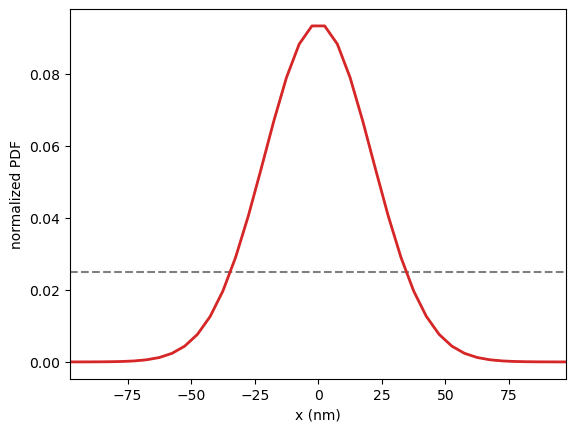

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from fplanck import fokker_planck, boundary, gaussian_pdf

nm = 1e-9
viscosity = 8e-4
radius = 50*nm
drag = 6*np.pi*viscosity*radius

sim = fokker_planck(temperature=300, drag=drag, extent=200*nm,
            resolution=5*nm, boundary=boundary.periodic)

### steady-state solution
steady = sim.steady_state()

### time-evolved solution
w = 30*nm
pdf = gaussian_pdf(0, w)
p0 = pdf(sim.grid[0])

Nsteps = 200
time, Pt = sim.propagate_interval(pdf, 1e-3, Nsteps=Nsteps)

### animation
fig, ax = plt.subplots()

ax.plot(sim.grid[0]/nm, steady, color='k', ls='--', alpha=.5)
ax.plot(sim.grid[0]/nm, p0, color='red', ls='--', alpha=.3)
line, = ax.plot(sim.grid[0]/nm, p0, lw=2, color='C3')

def update(i):
    line.set_ydata(Pt[i])
    return [line]

anim = FuncAnimation(fig, update, frames=range(Nsteps), interval=30)
ax.set(xlabel='x (nm)', ylabel='normalized PDF')
ax.margins(x=0)

plt.show()

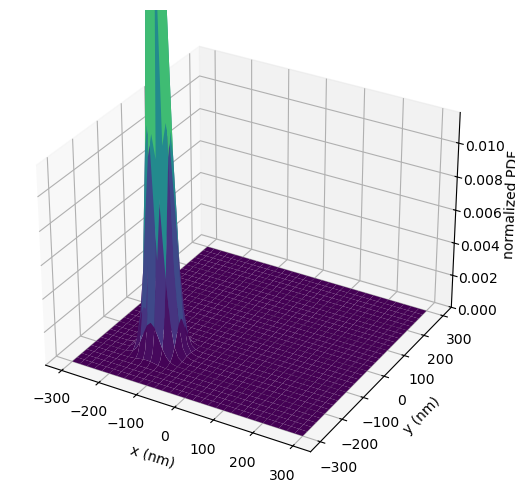

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from fplanck import fokker_planck, boundary, gaussian_pdf, harmonic_potential
from mpl_toolkits.mplot3d import Axes3D

nm = 1e-9
viscosity = 8e-4
radius = 50*nm
drag = 6*np.pi*viscosity*radius

U = harmonic_potential((0,0), 1e-6)
sim = fokker_planck(temperature=300, drag=drag, extent=[600*nm, 600*nm],
            resolution=10*nm, boundary=boundary.reflecting, potential=U)

### time-evolved solution
pdf = gaussian_pdf(center=(-150*nm, -150*nm), width=30*nm)
p0 = pdf(*sim.grid)

Nsteps = 200
time, Pt = sim.propagate_interval(pdf, 2e-3, Nsteps=Nsteps)

### animation
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), constrained_layout=True)

surf = ax.plot_surface(*sim.grid/nm, p0, cmap='viridis')

ax.set_zlim([0,np.max(Pt)/3])
ax.autoscale(False)

def update(i):
    global surf
    surf.remove()
    surf = ax.plot_surface(*sim.grid/nm, Pt[i], cmap='viridis')

    return [surf]

anim = FuncAnimation(fig, update, frames=range(Nsteps), interval=30)
ax.set(xlabel='x (nm)', ylabel='y (nm)', zlabel='normalized PDF')

plt.show()

/tmp/ipykernel_133647/2309349601.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


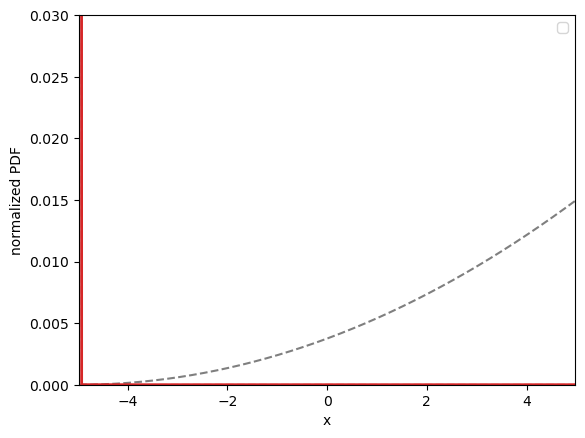

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from fplanck import fokker_planck, boundary, delta_function

xc = -5
def drag(x):
    A = 1e-16
    return A*((x - xc)**2)

sim = fokker_planck(temperature=1, drag=drag, extent=10,
            resolution=.05, boundary=boundary.reflecting)

### steady-state solution
steady = sim.steady_state()

### time-evolved solution
pdf = delta_function(xc)
p0 = pdf(sim.grid[0])

Nsteps = 200
time, Pt = sim.propagate_interval(pdf, 1e5, Nsteps=Nsteps)

### animation
fig, ax = plt.subplots()

ax.plot(sim.grid[0], steady, color='k', ls='--', alpha=.5)
ax.plot(sim.grid[0], p0, color='red', ls='--', alpha=.3)
line, = ax.plot(sim.grid[0], p0, lw=2, color='C3')

def update(i):
    line.set_ydata(Pt[i])
    return [line]

anim = FuncAnimation(fig, update, frames=range(Nsteps), interval=30)
ax.set(xlabel='x', ylabel='normalized PDF')
ax.margins(x=0)
ax.set_ylim([0,0.03])
ax.legend()

plt.show()

/home/shashank/micromamba/envs/sc_rna/lib/python3.11/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


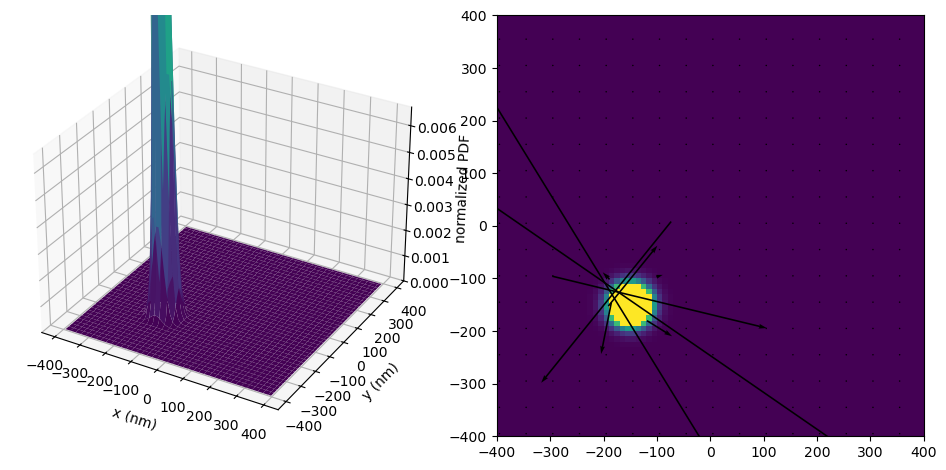

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from fplanck import fokker_planck, boundary, gaussian_pdf
from mpl_toolkits.mplot3d import Axes3D

nm = 1e-9
viscosity = 8e-4
radius = 50*nm
drag = 6*np.pi*viscosity*radius

def F(x, y):
    rad = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    L = 200*nm

    Fphi = 1e-12*rad/L*np.exp(-rad/L)
    Frad = 1e-12*(1 - rad/L)*np.exp(-rad/L)

    Fx = -np.sin(phi)*Fphi + np.cos(phi)*Frad
    Fy = np.cos(phi)*Fphi + np.sin(phi)*Frad
    return np.array([Fx, Fy])

sim = fokker_planck(temperature=300, drag=drag, extent=[800*nm, 800*nm],
            resolution=10*nm, boundary=boundary.reflecting, force=F)

### time-evolved solution
pdf = gaussian_pdf(center=(-150*nm, -150*nm), width=30*nm)
p0 = pdf(*sim.grid)

Nsteps = 200
time, Pt = sim.propagate_interval(pdf, 20e-3, Nsteps=Nsteps)

### animation
fig = plt.figure(figsize=plt.figaspect(1/2))
ax1 = fig.add_subplot(1,2,1, projection='3d')

surf = ax1.plot_surface(*sim.grid/nm, p0, cmap='viridis')

ax1.set_zlim([0,np.max(Pt)/5])
ax1.autoscale(False)

ax1.set(xlabel='x (nm)', ylabel='y (nm)', zlabel='normalized PDF')

ax2 = fig.add_subplot(1,2,2)

skip = 5
idx = np.s_[::skip, ::skip]
im = ax2.pcolormesh(*sim.grid/nm, p0, vmax=np.max(Pt)/5)
current = sim.probability_current(p0)
arrows = ax2.quiver(sim.grid[0][idx]/nm, sim.grid[1][idx]/nm, 
        current[0][idx], current[1][idx], pivot='mid')

xmax = 400
ax2.set_xlim([-xmax, xmax])
ax2.set_ylim([-xmax, xmax])

def update(i):
    global surf
    surf.remove()
    surf = ax1.plot_surface(*sim.grid/nm, Pt[i], cmap='viridis')

    data = Pt[i, :-1,:-1]
    im.set_array(np.ravel(data))
    im.set_clim(vmax=np.max(data))

    current = sim.probability_current(Pt[i])
    arrows.set_UVC(current[0][idx], current[1][idx])
    return [surf, im, arrows]

anim = FuncAnimation(fig, update, frames=range(Nsteps), interval=30)
plt.tight_layout()

plt.show()

In [15]:
import numpy as np
import dolfinx
import ufl
import numpy as np
from mpi4py import MPI
from petsc4py import PETSc
from dolfinx import fem, mesh, io, plot
from dolfinx.fem.petsc import LinearProblem
import matplotlib.pyplot as plt

# Define simulation parameters
num_timepoints = 3
num_cells = 100
num_genes = 100
growth_factor = 1.2  # Adjust growth factor as needed

# Create a mesh for the time domain
mesh = mesh.create_interval(0,num_timepoints)

# Define function space (using Lagrange polynomials of degree 1)
V = FunctionSpace(mesh, "CG", 1)

# Define trial and test functions
u = TrialFunction(V)
v = TestFunction(V)

# Define initial condition (uniform gene expression)
initial_condition = Expression("1.0", degree=1)
u0 = interpolate(initial_condition, V)

# Define diffusion coefficient matrix (example: constant diagonal matrix)
diffusion_matrix = np.eye(num_genes) * 0.1

# Define potential energy landscape (example: quadratic)
def potential_energy(gene_expression):
    return np.sum(gene_expression**2)

# Define birth/death rate (example: constant)
birth_death_rate = 0.01

# Define stochastic noise term
noise_level = 0.05
noise = Expression("noise_level * random.gaussian(0, 1)", degree=1, noise_level=noise_level)

# Weak form of the diffusion-drift equation
a = (dot(grad(u), grad(v)) + u*v)*dx
L = (u0*v + noise*v)*dx

# Solve the PDE using FEniCS
u = Function(V)
t = 0.0
dt = 1.0  # Time step

while t < num_timepoints:
    L += dt * (dot(diffusion_matrix, u) - grad(potential_energy(u)) + birth_death_rate*u)*v*dx
    solve(a == L, u)
    t += dt

# Extract gene expression values at each timepoint
gene_expression_values = u.vector().get_local()

# ... (rest of the visualization code remains the same)

TypeError: create_interval() missing 1 required positional argument: 'points'